In [1]:
import pandas as pd
import numpy as np

print('numpy version - ',np.__version__)
print('pandas version -',pd.__version__)
# ml
import sklearn
import missingno as msno

from sklearn.datasets import load_iris,load_breast_cancer

print('sklearn version - ',sklearn.__version__)


from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score,\
cross_validate,GridSearchCV,train_test_split 

from sklearn.tree            import DecisionTreeClassifier 
from sklearn.linear_model    import LogisticRegression, LinearRegression #
from sklearn.ensemble        import RandomForestClassifier #
from sklearn.metrics         import accuracy_score, recall_score,\
precision_score, f1_score, confusion_matrix, make_scorer,\
precision_recall_curve
                            #(2진분류에만 사용)
from sklearn.impute          import SimpleImputer

import seaborn as sns
from io import StringIO
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder,\
StandardScaler,MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

numpy version -  1.20.3
pandas version - 1.3.4
sklearn version -  0.24.2


#### Regression(회귀)
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법
- 예측이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다.
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- y(종속변수) = wx(x는 독립변수) + b 
- w : 가중치(weight), b : 바이어스(bias)
- cost(w,b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- 회귀계수 : coefficients - 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수 1개이면 단일회귀 - 선형회귀
- 회귀유형 : 독립변수 여러개이면 다중회귀 - 비선형회귀
- 스텝와이즈?

In [ ]:
- 학습시키는 과정 -> 손실(loss)를 보기

In [2]:
print('단일회귀 - ')
print()
frm = pd.DataFrame({
    'height': [1.47, 1.5, 1.52, 1.57, 1.6, 1.63, 1.65, 1.7, 1.75, 1.78, 1.80, 1.83],
    'mass'  : [52.21, 53.12, 54.48, 55.84, 57.2, 59.93, 61.29, 63.11, 64.47, 65.28, 68.1,68.92]
})
frm

단일회귀 - 



,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.57,55.84
4,1.60,57.20
5,1.63,59.93
6,1.65,61.29
7,1.70,63.11
8,1.75,64.47
9,1.78,65.28


In [3]:
print('독립변수 또는 설명변수 - ')
print('type - ',type(frm[['height']]))# 데이터프레임
print('type - ',type(frm['height']))# 시리즈
x = frm[['height']]

독립변수 또는 설명변수 - 
type -  <class 'pandas.core.frame.DataFrame'>
type -  <class 'pandas.core.series.Series'>


In [4]:
print('종속변수 - ')
print('type - ',type(frm[['mass']]))
y = frm[['mass']]

종속변수 - 
type -  <class 'pandas.core.frame.DataFrame'>


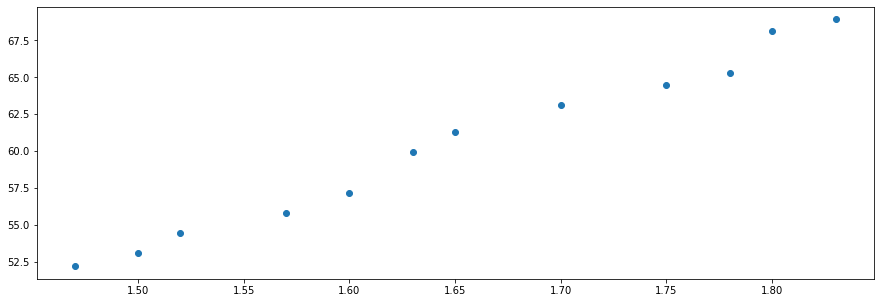

In [5]:
plt.figure(figsize = (15,5))
plt.plot(x,y,'o')

plt.show()
plt.close()

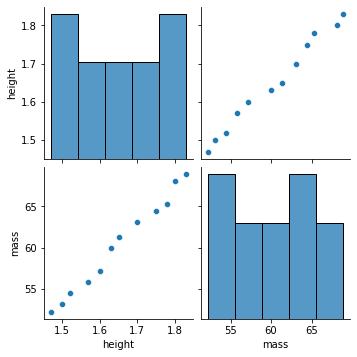

In [6]:
sns.pairplot(frm)
plt.show()
plt.close()

In [7]:
linear_model = LinearRegression()
linear_model.fit(x, y)

LinearRegression()

In [8]:
print('사용자 데이터를 입력하여 예측값을 확인 - ')
user_pred = linear_model.predict([[1.79]])#들어가는 값이 2차원배열
print('user pred - ',user_pred)
y_pred = linear_model.predict(x)
print('y_pred - ',y_pred)

사용자 데이터를 입력하여 예측값을 확인 - 
user pred -  [[66.87674829]]
y_pred -  [[51.91084744]
 [53.31390064]
 [54.24926945]
 [56.58769146]
 [57.99074466]
 [59.39379786]
 [60.32916667]
 [62.66758867]
 [65.00601068]
 [66.40906389]
 [67.34443269]
 [68.74748589]]


In [9]:
print('w = 기울기 : ',linear_model.coef_)
print('b = 절편 : ', linear_model.intercept_)

w = 기울기 :  [[46.76844015]]
b = 절편 :  [-16.83875957]


In [10]:
46.76844015*1.47-16.83875957

51.91084745050001

In [11]:
print('R - squared(결정계수) - ')# 신뢰도
print()
print('R = ',linear_model.score(x,y))

R - squared(결정계수) - 

R =  0.9865457494023419


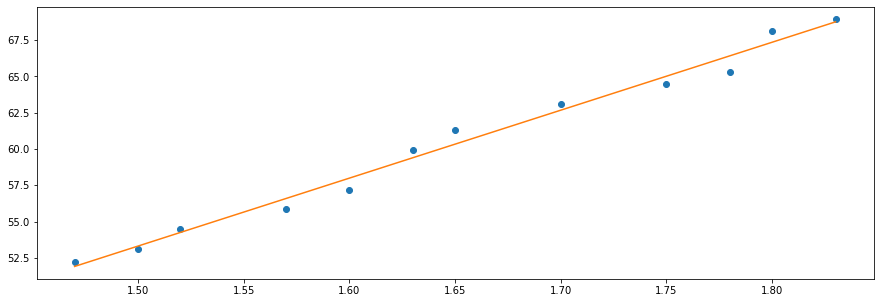

In [15]:
plt.figure(figsize = (15,5))
plt.plot(x,y,'o')
plt.plot(x,linear_model.predict(x))
plt.show()
plt.close()

In [12]:
mpg_frm = pd.read_csv('C:/Users/shhmu/data/auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg', 'cylinders' , 'displacement', 'horsepower',\
                   'weight', 'acc', 'model year', 'origin', 'name']

In [13]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
mpg_frm.describe()

,mpg,cylinders,displacement,weight,acc,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [17]:
mpg_frm['horsepower'].replace('?',np.nan,inplace=True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [18]:
mpg_frm.dropna(subset=['horsepower'] , axis=0 , inplace = True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [19]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acc           392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [20]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [21]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_subset_frm

다중회귀 - 


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


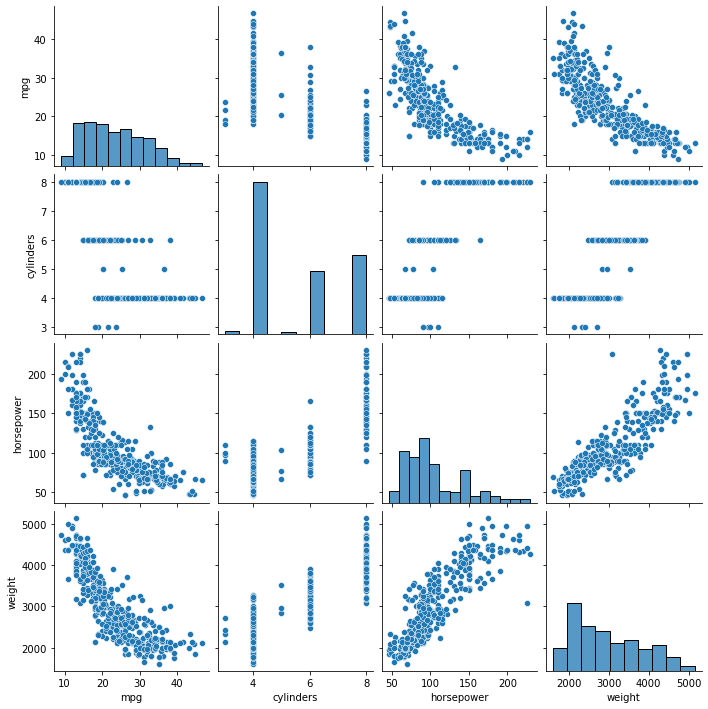

In [22]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [23]:
print('종속변수 독립변수 분리 - ') 
print('종속변수 - ')
Y = mpg_subset_frm['mpg']
print('독립변수 - ')
X = mpg_subset_frm[['cylinders' , 'horsepower' , 'weight']] 


종속변수 독립변수 분리 - 
종속변수 - 
독립변수 - 


In [27]:
X_train, X_test , y_train, y_test = train_test_split(X, Y,
                                                     
                                                     random_state = 111) 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((294, 3), (98, 3), (294,), (98,))

In [28]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, y_train)
print("w = 기울기 : " , mpg_linear_model.coef_)
print()
print('b = 절편   : ' , mpg_linear_model.intercept_)

w = 기울기 :  [-0.1873237  -0.05339715 -0.00539255]

b = 절편   :  46.26390195864124


In [29]:
print('모델의 신뢰도 - score')
r_squared = mpg_linear_model.score(X_test, y_test)
print(r_squared)

모델의 신뢰도 - score
0.7015725308283286


In [30]:
print('예측 - ')
y_pred = mpg_linear_model.predict(X_test)
y_pred

예측 - 


array([ 6.05244684,  9.41464599, 27.36600493, 31.76411966, 23.69820485,
       31.35142583, 30.14232911, 20.05999116, 25.16051295, 24.15012224,
       26.73243515, 14.45755267, 17.14854347, 20.22529456, 22.70311582,
       27.80196321, 29.91320045,  7.75120878, 16.47436568, 31.69824316,
       10.78362437, 29.29569905, 25.90579029, 16.50672097, 27.63521327,
       22.93213521, 26.91303088, 26.0547484 , 28.65334822, 27.83812606,
       28.51906285, 25.23119345, 18.92819364, 12.97724356, 25.33904441,
       12.21150172, 10.48809088, 15.76794187, 26.31075974, 26.76806967,
       27.63457568, 30.2060923 , 31.33144062, 24.79014123, 24.80465381,
       27.31224894, 31.17939261, 14.19490279,  8.39831456, 22.1020106 ,
       33.00493407, 24.08635906, 31.34064073, 19.65643537, 32.28380833,
       26.26761935, 15.50909956, 23.18202514, 29.67053578,  7.48877744,
       20.78809443,  9.53878386, 21.81070373, 29.32953006, 20.85072089,
       28.68475612, 29.29569905, 32.54286918, 30.26265942, 32.60

In [31]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
regression_actual_guess

,actual,guess
95,12.0,6.052447
116,16.0,9.414646
273,23.9,27.366005
195,29.0,31.764120
194,22.5,23.698205
...,...,...
86,14.0,16.954302
16,18.0,25.001507
226,20.5,21.063781
168,23.0,26.851709


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


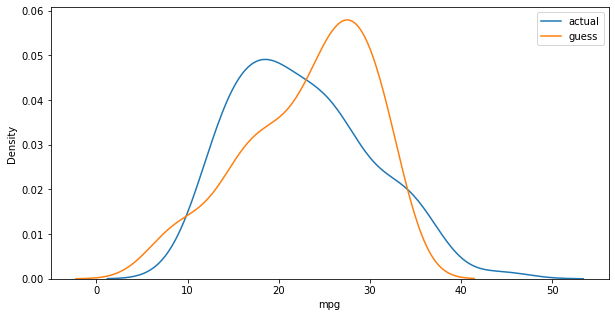

In [32]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test, hist=False, label='actual')
ax2 = sns.distplot(y_pred, hist=False, label='guess')

plt.legend()
plt.show()
plt.close()

#### 주택모델 예측 모델[회귀실습구현]
- manhattan.csv

In [33]:
house_frm = pd.read_csv('C:/Users/shhmu/data/manhattan.csv')
house_frm.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [34]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [35]:
Y = house_frm['rent']
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

상관관계 분석을 위한 시각화 - 



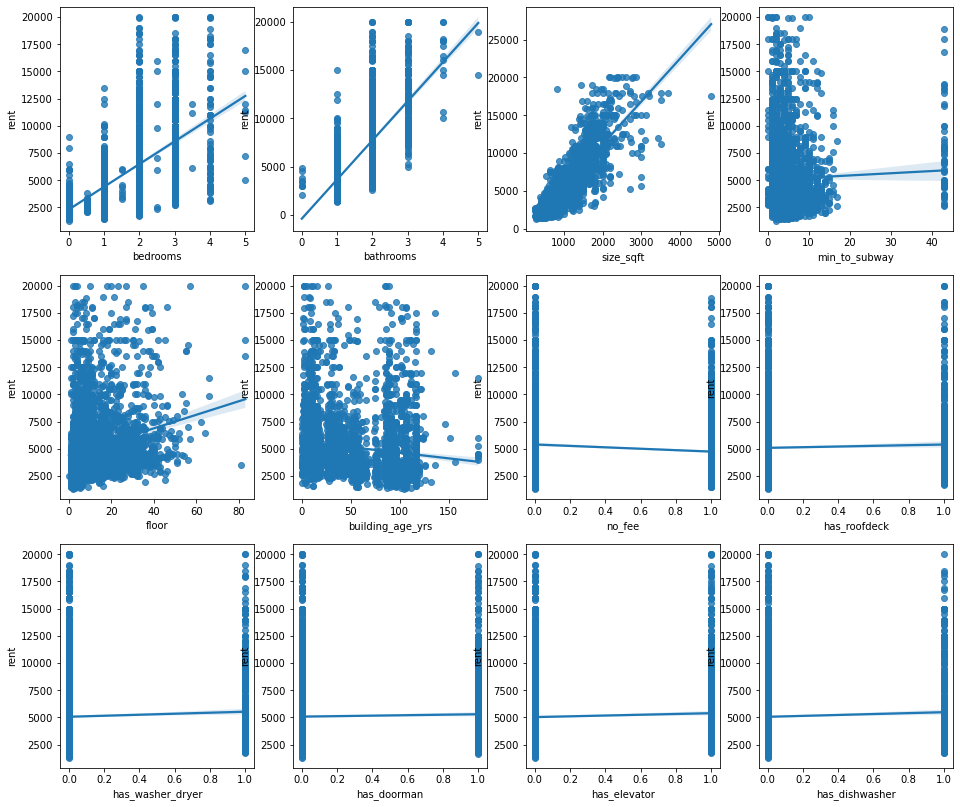

In [36]:
print('상관관계 분석을 위한 시각화 - ')
print()
fig, axs = plt.subplots(figsize=(16,14), ncols=4, nrows=3)

for idx, feature in enumerate(X) :
    row = int(idx/4)
    col = idx%4
    sns.regplot(x=feature, y='rent',data=house_frm,ax=axs[row][col])

##### 1. 데이터세트 분리
##### 2. 모델생성 및 학습
##### 3. 기울기, 절편 확인
##### 4. 모델의 신뢰도(결정계수 확인)
##### 5. 사용자의 데이터를 넣어서 가격예측
##### 6. 실제 임대료, 예측 임대료 프레임 구축
##### 7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!

In [37]:
print('1. 데이터세트 분리')
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

Y = house_frm['rent']

xh_train, xh_test , yh_train, yh_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
xh_train.shape , xh_test.shape , yh_train.shape , yh_test.shape

1. 데이터세트 분리


((2831, 12), (708, 12), (2831,), (708,))

In [38]:
print('2. 모델생성 및 학습')
linear_house_model = LinearRegression()
linear_house_model.fit(xh_train, yh_train)

2. 모델생성 및 학습


LinearRegression()

In [39]:
print('3. 기울기, 절편 확인')
print("w = 기울기 : " , linear_house_model.coef_)
print()
print('b = 절편   : ' , linear_house_model.intercept_)

3. 기울기, 절편 확인
w = 기울기 :  [-304.72964384 1158.78261246    4.88315724  -18.74411341   22.70787792
   -7.81871649 -125.8524711    -8.97421713  170.5987588   -37.35605549
  -12.59523591  -15.84252636]

b = 절편   :  -351.27412671957063


In [40]:
print('4. 모델의 신뢰도(결정계수 확인)')
r_squared = linear_house_model.score(xh_test, yh_test)
print(r_squared)

4. 모델의 신뢰도(결정계수 확인)
0.8023070306419079


In [41]:
print('5. 사용자의 데이터를 넣어서 가격예측')
my_apt = [[2,1,620,10,11,12,0,0,1,0,1,1]]
user_pred = linear_house_model.predict(my_apt)
print(user_pred)
yh_pred = linear_house_model.predict(xh_test)

5. 사용자의 데이터를 넣어서 가격예측
[3336.28860626]


In [42]:
print('6. 실제 임대료, 예측 임대료 프레임 구축')
house_actual_guess = pd.DataFrame({
    'actual' : yh_test , 
    'guess'  : yh_pred
})
house_actual_guess

6. 실제 임대료, 예측 임대료 프레임 구축


,actual,guess
2291,3300,3657.490665
1317,5500,6115.173880
2251,3495,3032.272155
361,4500,4739.068464
491,2900,3655.232766
...,...,...
3455,2996,2935.694948
1779,2975,3361.256813
1184,4885,4796.337196
2605,2150,2950.179581


7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!


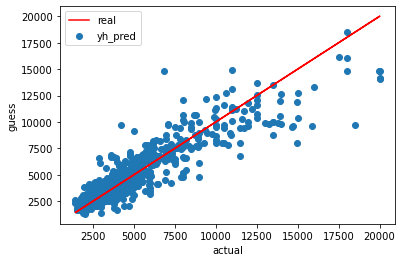

In [43]:
print('7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!')
plt.scatter(yh_test,yh_pred, label = 'yh_pred')
plt.plot(yh_test, yh_test, c = 'red', label = 'real')
plt.xlabel('actual')
plt.ylabel('guess')
plt.legend(loc = "best")
plt.show()
plt.close()

#### 성능지표

In [44]:
iris = load_iris()
print('type - ',type(iris))
print('keys - ',iris.keys())
print('0 -> setosa , 1 -> versicolor, 2 -> virginica')

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
0 -> setosa , 1 -> versicolor, 2 -> virginica


In [45]:
print('종속변수 - ')
Y = pd.DataFrame(data= iris.target, columns = ['species'])
Y

종속변수 - 


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [46]:
print('독립변수 - ')
X = pd.DataFrame(data= iris.data, columns = iris.feature_names)
X

독립변수 - 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
Y['species'] = Y['species'].replace([0,1,2],
                                    ['setosa','versicolor','virginica'])
iris_frm = pd.concat([X,Y], axis = 1)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
iris_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


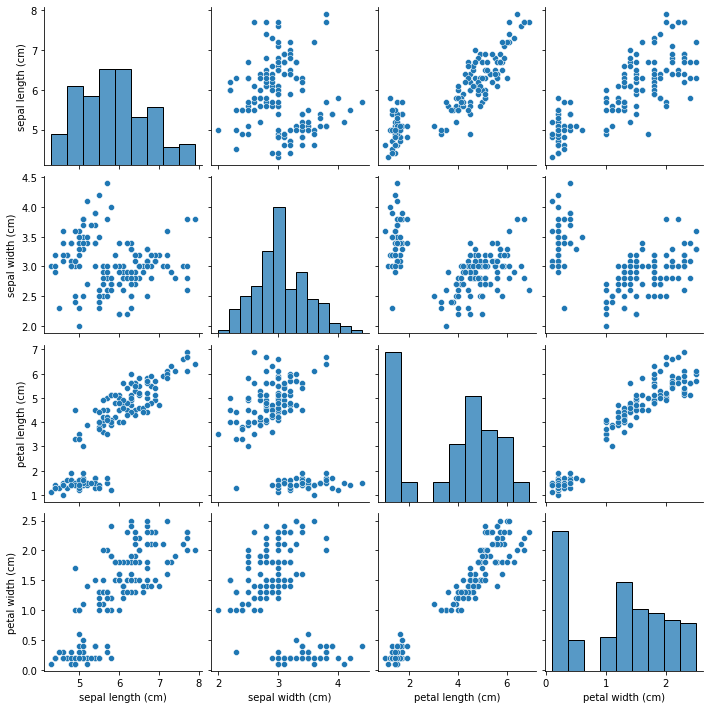

In [49]:
sns.pairplot(iris_frm)

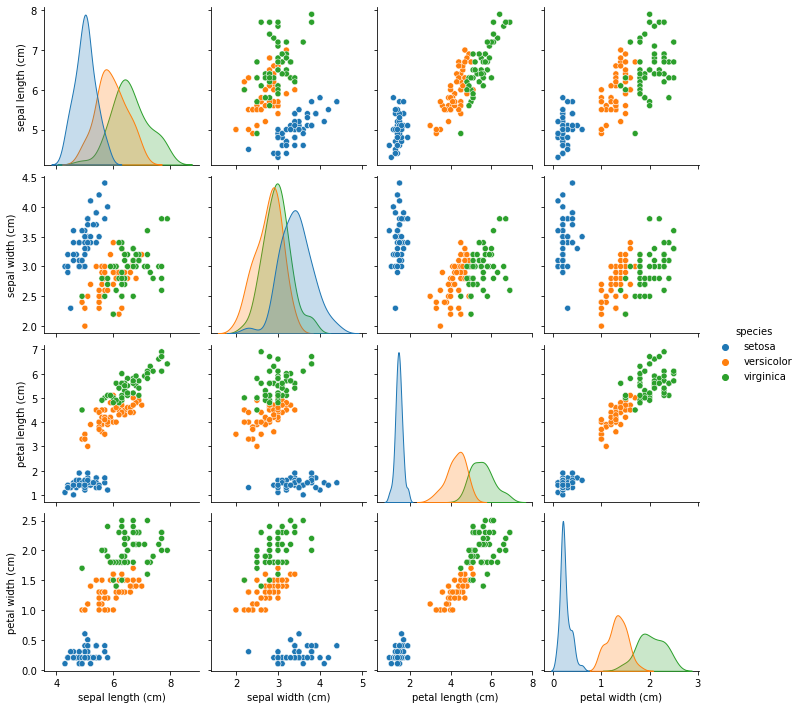

In [50]:
sns.pairplot(iris_frm, hue='species')

In [51]:
iris_frm['species'] = iris_frm['species'].replace(['setosa','versicolor','virginica'],
                                      [0,1,2])
iris_frm


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
print('종속변수 - ')
Y = iris_frm['sepal length (cm)']
print('독립변수 - ')
X = iris_frm.drop('sepal length (cm)', axis = 1)

종속변수 - 
독립변수 - 


In [53]:
iris_model = LinearRegression()
iris_model.fit(X, Y)

LinearRegression()

In [56]:
x_train, x_test , y_train, y_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [57]:
r_squared = iris_model.score(X,Y)
r_squared
y_pred = iris_model.predict(x_test)
iris_actual_guess = pd.DataFrame({
    'actual_sepal_length' : y_test,
    'guess_sepal_length' : y_pred
})

In [55]:
user_pred = iris_model.predict([[1,2,3,4]])
user_pred

array([1.84346506])

In [58]:
r_squared = iris_model.score(X,Y)
r_squared

0.8621931701975809

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
print('성능평가 지표 - ')
print()
# mae 모델과의 차이를 절대값을 취해 모두 더함(과적합, 과소적합 구분X,직관적O)
print('mae - ', mean_absolute_error(y_test,y_pred))
# mse 모델과의 차이를 제곱을 취해 모두 더함
print('mse - ', mean_squared_error(y_test,y_pred))
# rmse mse에 루트를 씌움
print('rmse - ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R - ', iris_model.score(x_test,y_test))

성능평가 지표 - 

mae -  0.23012267158376168
mse -  0.0782060676972798
rmse -  0.27965347789233697
R -  0.8891567544448004


In [61]:
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_frm['horsepower'].replace('?',np.nan,inplace=True)
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_subset_frm
Y = mpg_subset_frm['mpg']
print('독립변수 - ')
X = mpg_subset_frm[['cylinders' , 'horsepower' , 'weight']] 
x1_train, x1_test , y1_train, y1_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(x1_train, y1_train)
y1_pred = mpg_linear_model.predict(x1_test)
min(y1_pred)

독립변수 - 


5.616318787921848

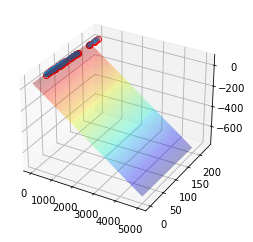

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x1_test.cylinders
y = x1_test.horsepower
z = y1_pred

X = np.arange(0, 5000, 1)
Y = np.arange(0, 200, 1)
Z = np.arange(0,50,0.1)
X, Y = np.meshgrid(X, Y)
Z = -0.15188535*X  -0.0589312*Y + 46.34299652357524

ax.plot(x, y, z, linestyle="none", marker="o", mfc="none", markeredgecolor="red")
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.jet)
ax.scatter(x,y,z)

plt.show()

In [ ]:
w = 기울기 :  [-0.15188535 -0.0589312  -0.00530238]

b = 절편   :  46.34299652357524